In [1]:
import matplotlib.pyplot as plt
from pyspark.mllib.clustering import GaussianMixtureModel

In [2]:
# Load data from S3
lines = sc.textFile(
    name="s3://csed516/largerdatasetspark/wise-colors-15-20-subset1.csv",
    minPartitions=24,
)
parts = lines.map(lambda l: l.split(","))
sources = parts.map(lambda p: (float(p[1]), float(p[2]), float(p[3])))

In [3]:
gmm = GaussianMixtureModel.load(sc, "gmm.model.2.large.dims.subset")

In [4]:
color_codes = ["r", "y", "k", "m", "g", "b", "c"]
names_and_ansi_codes = {
    "b": [34, "blue"],
    "g": [32, "green"],
    "r": [31, "red"],
    "c": [36, "cyan"],
    "m": [35, "magenta"],
    "y": [33, "yellow"],
    "k": [30, "black"],
}

def print_class_params(_class):
    print("weight: {:.3f}".format(gmm.weights[_class]))
    print("mean: [{:.3f} {:.3f} {:.3f}]".format(*gmm.gaussians[_class].mu))
    cov = gmm.gaussians[_class].sigma.values
    print("covariance matrix: [{:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[i*3] for i in range(3)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*3)+1] for i in range(3)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*3)+2] for i in range(3)]
    ))
    print("color: \x1b[{}m{}\x1b[0m".format(*names_and_ansi_codes[color_codes[_class]]))

### Class 0

In [5]:
print_class_params(_class=0)

weight: 0.229
mean: [1.893 2.571 3.419]
covariance matrix: [ 0.316  0.216 -0.107]
                   [ 0.216  0.236 -0.105]
                   [-0.107 -0.105  0.297]
color: red


### Class 1

In [6]:
print_class_params(_class=1)

weight: 0.205
mean: [0.907 1.686 2.373]
covariance matrix: [ 0.085  0.084 -0.024]
                   [ 0.084  0.097 -0.036]
                   [-0.024 -0.036  0.674]
color: yellow


### Class 2

In [7]:
print_class_params(_class=2)

weight: 0.154
mean: [2.267 2.722 2.198]
covariance matrix: [ 0.222  0.170 -0.019]
                   [ 0.170  0.140 -0.026]
                   [-0.019 -0.026  0.932]
color: black


### Class 3

In [8]:
print_class_params(_class=3)

weight: 0.016
mean: [1.812 5.512 0.986]
covariance matrix: [ 8.544 -1.216  0.746]
                   [-1.216  5.124 -0.030]
                   [ 0.746 -0.030  1.198]
color: magenta


### Class 4

In [9]:
print_class_params(_class=4)

weight: 0.083
mean: [1.295 3.218 3.053]
covariance matrix: [ 0.386  0.089  0.006]
                   [ 0.089  0.690 -0.309]
                   [ 0.006 -0.309  0.987]
color: green


### Class 5

In [10]:
print_class_params(_class=5)

weight: 0.130
mean: [1.856 2.953 2.371]
covariance matrix: [ 0.633  0.544  0.046]
                   [ 0.544  0.614  0.148]
                   [ 0.046  0.148  1.825]
color: blue


### Class 6

In [11]:
print_class_params(_class=6)

weight: 0.182
mean: [0.837 1.801 3.373]
covariance matrix: [ 0.056  0.060 -0.010]
                   [ 0.060  0.200 -0.064]
                   [-0.010 -0.064  0.329]
color: cyan


In [12]:
sampled_sources = sources.sample(withReplacement=False, fraction=0.5)

classes = gmm.predict(sampled_sources)
colors = classes.map(lambda c: color_codes[c])

x = sampled_sources.map(lambda ss: ss[0])
y = sampled_sources.map(lambda ss: ss[1])
z = sampled_sources.map(lambda ss: ss[2])

In [13]:
def plot_2d_scatterplot(x_axis, y_axis):
    figure = plt.figure(figsize=(16,12))
    plt.xlabel(x_axis, fontsize="xx-large")
    plt.ylabel(y_axis, fontsize="xx-large")
    plt.scatter(eval(x_axis).collect(), eval(y_axis).collect(), s=0.125, c=colors.collect())
    plt.show()

### x vs. y

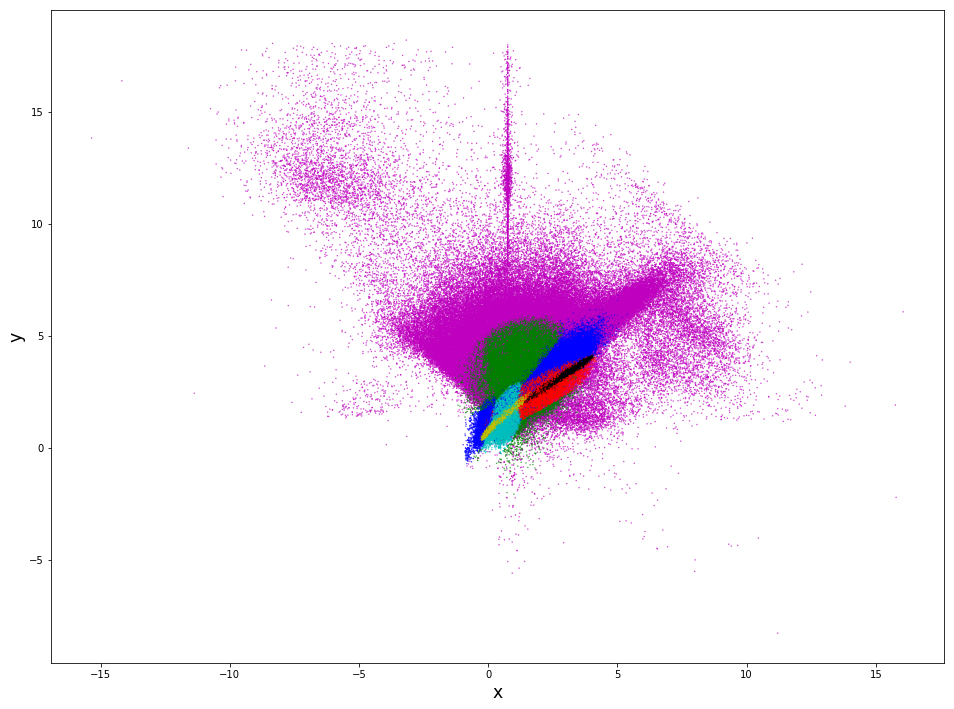

In [14]:
plot_2d_scatterplot(x_axis="x", y_axis="y")

### x vs. z

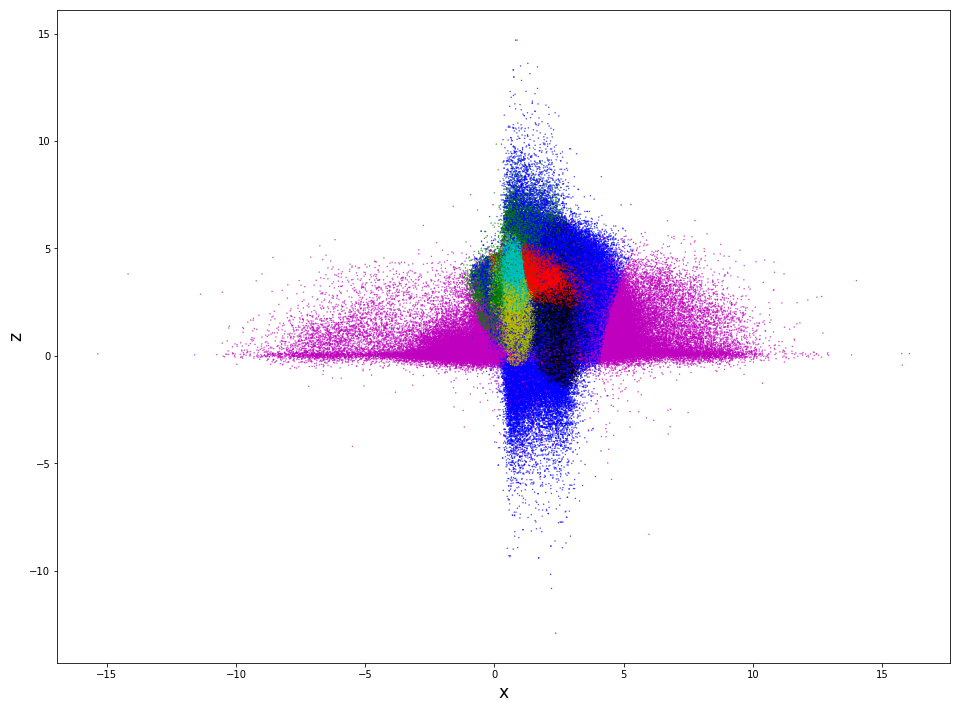

In [15]:
plot_2d_scatterplot(x_axis="x", y_axis="z")

### y vs. z

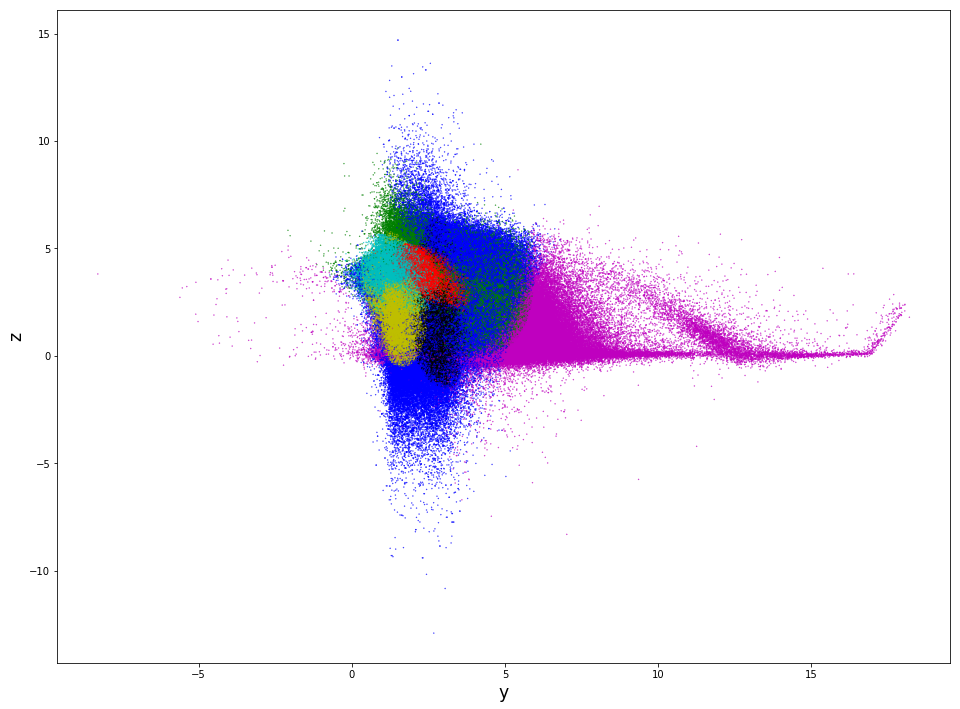

In [16]:
plot_2d_scatterplot(x_axis="y", y_axis="z")